##### QtCore.pyqtSignal 信號傳遞
在 PyQt5 裡的元件，都是透過信號的傳遞進行溝通和互動，雖然大部分的元件都有 connect 接收訊息的機制，\
但也可以使用 QtCore.pyqtSignal 的方式自訂信號進行傳遞，這篇教學會介紹相關用法。

##### 開始使用 QtCore.pyqtSignal 
首先使用 pyqtSignal() 建立 pyqtSignal 物件，接著透過 emit() 方法發送信號，使用 connect() 方法監聽是否有信號，\
下方程式碼執行後，按下按鈕時就會發送信號，並在後台印出收到信號的文字。

* QtCore.pyqtSignal 僅支援 class 寫法。

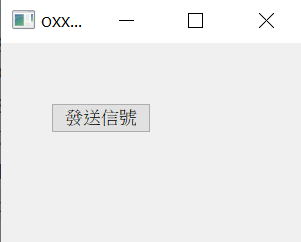

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import pyqtSignal
import sys

class mainWindow(QtWidgets.QWidget):

    signal = pyqtSignal()    # 建立信號物件

    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(300, 200)
        self.ui()
        self.signal.connect(self.signalListener)            # 監聽信號

    def ui(self):
        self.btn = QtWidgets.QPushButton(self)
        self.btn.setText('發送信號')
        self.btn.setGeometry(50,60,100,30)
        self.btn.clicked.connect(lambda:self.signal.emit())  # 發送信號

    def signalListener(self):
        print('收到信號')

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = mainWindow()
    Form.show()
sys.exit(app.exec_())

##### QtCore.pyqtSignal 支援的信號類型 
QtCore.pyqtSignal 可以在定義物件時，指定發送特定類型的信號，常見定義類型的方式如下：

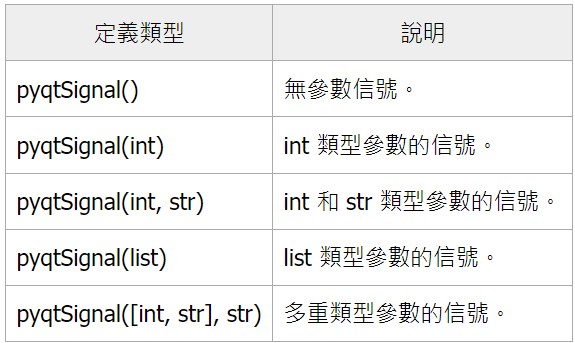

##### 將程式修改成 QtCore.pyqtSignal 方式 
參考「QPushButton 按鈕 ( class 寫法 )」文章範例，建立具有 QLabel 和 QPushButton 的視窗，程式執行後，點擊不同的按鈕時，QLabel 就會顯示不同的文字。

In [ ]:
from PyQt5 import QtWidgets
import sys

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(300, 200)
        self.ui()

    def ui(self):
        self.label = QtWidgets.QLabel(self)
        self.label.setText('A')
        self.label.setStyleSheet('font-size:20px;')
        self.label.setGeometry(50,30,100,30)

        self.btn2 = QtWidgets.QPushButton(self)
        self.btn2.setText('B')
        self.btn2.setGeometry(110,60,50,30)
        self.btn2.clicked.connect(lambda:self.showMsg('B'))  # 使用 lambda 函式

        self.btn1 = QtWidgets.QPushButton(self)
        self.btn1.setText('A')
        self.btn1.setGeometry(50,60,50,30)
        self.btn1.clicked.connect(lambda:self.showMsg('A'))  # 使用 lambda 函式

    def showMsg(self, e):
        self.label.setText(e)

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())

上述的程式碼裡，按鈕的點擊事件 ( clicked ) 使用了 connect 方法產生點擊事件的插槽 ( Slot )，\
當點擊事件發生時在背後會發送信號 signal，當插槽 slot 收到信號時，就會執行對應的動作 ( 函式 )，\
但信號的傳遞僅限於綁定的元件，沒有辦法跨出元件的範圍 ( 例如不同視窗溝通、不同函式之間溝通...等 )，\
這時如果使用 QtCore.pyqtSignal，就可以自訂發送的信號，只要放置接收信號的插槽接收到信號，就可以執行對應的動作。

了解原理後，就可將上述的程式碼改變成 pyqtSignal 的做法，也會得到相同的結果：

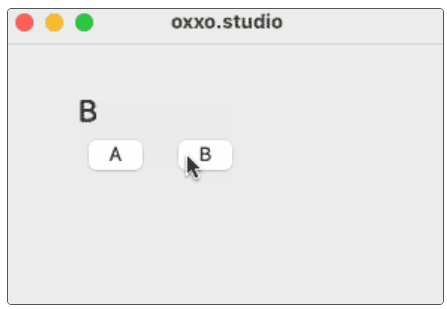

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import pyqtSignal
import sys

class MyWidget(QtWidgets.QWidget):

    signal = pyqtSignal(str)      # 建立 pyqtSignal 物件，傳遞字串格式內容

    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(300, 200)
        self.ui()
        self.signal.connect(self.showMsg)    # 建立插槽監聽信號

    def ui(self):
        self.label = QtWidgets.QLabel(self)
        self.label.setText('A')
        self.label.setStyleSheet('font-size:20px;')
        self.label.setGeometry(50,30,100,30)

        self.btn2 = QtWidgets.QPushButton(self)
        self.btn2.setText('B')
        self.btn2.setGeometry(110,60,50,30)
        self.btn2.clicked.connect(lambda:self.signal.emit('B'))  # 發送字串信號 B

        self.btn1 = QtWidgets.QPushButton(self)
        self.btn1.setText('A')
        self.btn1.setGeometry(50,60,50,30)
        self.btn1.clicked.connect(lambda:self.signal.emit('A'))  # 發送字串信號 A

    def showMsg(self, val):
        self.label.setText(val)   # 顯示內容

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())